In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types
from pathlib import Path



In [3]:
demand = dummy_data.create_dummy_site_demand(2022)
carbon = dummy_data.generate_dummy_carbon_profile(2022)
price = dummy_data.generate_dummy_price_profile(2022)

demand_2 = dummy_data.create_dummy_site_demand(2021)

demand_two = pd.concat([demand_2, demand], axis=0)


In [4]:
df = functions.add_time_features(demand)

In [5]:
df = manipulations.create_seasonal_average_week(enums.Season.SUMMER, df)

In [6]:
import plotly.express as px

# df = px.data.gapminder().query("country=='Canada'")
df = manipulations.EquationManipulator().data_formatter(df, 'Site energy [kWh]', '* 2', 'Site power [kW]')

fig = px.bar(df, y=["Site energy [kWh]"], title='Site demand for a week', color=df.index) #, color=df.index
fig.show()


In [7]:
data = {'A': [10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000],
        'B': [50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000],
        'C': [100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300]}

df = pd.DataFrame(data)

# Add outliers
df.loc[3, 'A'] = 500
df.loc[6, 'B'] = 3000
df.loc[9, 'C'] = 5000

demand_array = np.array(df)

In [8]:
dp.check_dataset(demand)

{'outliers': False, 'nan values': False, 'timeseries': True}

In [9]:
df_2 = dp.GenerateDatetime(freq='D').data_cleaner(df)
pd.infer_freq(df_2.index)

'D'

In [10]:
df.head(5)

,A,B,C
0,10,50,100
1,15,55,150
2,12,52,120
3,500,54,140
4,20,60,200


In [11]:
frequency = demand.index.freq

In [12]:
frequency

<30 * Minutes>

In [13]:
test = sdp.RunVisualisationPreparator(demand_array, 
                                      dp.check_dataset, 
                                      dp.OutlierRemover(), 
                                      dp.FillMissingData(), 
                                      dp.GenerateDatetime()
                                      )

In [14]:
test._data

array([[1.6409952e+18, 1.0000000e+01, 5.0000000e+01, 1.0000000e+02],
       [1.6409970e+18, 1.5000000e+01, 5.5000000e+01, 1.5000000e+02],
       [1.6409988e+18, 1.2000000e+01, 5.2000000e+01, 1.2000000e+02],
       [1.6410006e+18, 1.3500000e+01, 5.4000000e+01, 1.4000000e+02],
       [1.6410024e+18, 2.0000000e+01, 6.0000000e+01, 2.0000000e+02],
       [1.6410042e+18, 8.0000000e+00, 4.8000000e+01, 8.0000000e+01],
       [1.6410060e+18, 1.1000000e+01, 5.4000000e+01, 1.1000000e+02],
       [1.6410078e+18, 1.3000000e+01, 5.3000000e+01, 1.3000000e+02],
       [1.6410096e+18, 1.6000000e+01, 5.6000000e+01, 1.6000000e+02],
       [1.6410114e+18, 5.0000000e+00, 4.5000000e+01, 1.4500000e+02],
       [1.6410132e+18, 1.0500000e+01, 5.0500000e+01, 1.6000000e+02],
       [1.6410150e+18, 1.0000000e+01, 5.0000000e+01, 1.0000000e+02],
       [1.6410168e+18, 1.5000000e+01, 5.5000000e+01, 1.5000000e+02],
       [1.6410186e+18, 1.2000000e+01, 5.2000000e+01, 1.2000000e+02],
       [1.6410204e+18, 1.4000000e+

# Data preperation
### Describe

In [15]:
dp.describe_data(demand)

,Site energy [kWh]
count,17520.000000
mean,11.829737
std,11.071467
min,0.000000
25%,4.000000
50%,8.000000
75%,18.000000
max,40.000000


### Outlier remover

In [16]:
# print(df)
outlier_remover = dp.OutlierRemover()
outliers_removed_df = outlier_remover.data_cleaner(df)

print("\nDataFrame with outliers removed:")
outliers_removed_df.head()


DataFrame with outliers removed:


,A,B,C
0,10.0,50.0,100.0
1,15.0,55.0,150.0
2,12.0,52.0,120.0
3,NaN,54.0,140.0
4,20.0,60.0,200.0


### Missing data filler

In [17]:
fillMissing = dp.FillMissingData()
filled_na_df = fillMissing.data_cleaner(outliers_removed_df)
filled_na_df.head()

,A,B,C
0,10.0,50.0,100.0
1,15.0,55.0,150.0
2,12.0,52.0,120.0
3,13.5,54.0,140.0
4,20.0,60.0,200.0


### Generate datetime column/index

In [18]:
addDatetime = dp.GenerateDatetime(freq='W').data_cleaner(filled_na_df)
addDatetime.head()

,A,B,C
2022-01-02 00:00:00+00:00,10.0,50.0,100.0
2022-01-09 00:00:00+00:00,15.0,55.0,150.0
2022-01-16 00:00:00+00:00,12.0,52.0,120.0
2022-01-23 00:00:00+00:00,13.5,54.0,140.0
2022-01-30 00:00:00+00:00,20.0,60.0,200.0


# Manipulators

### Resampler

In [19]:
resampled_data = manipulations.ResampleManipulator().data_formatter(addDatetime, 'M', 'sum')
resampled_data.head()

,A,B,C
2022-01-31 00:00:00+00:00,70.5,271.0,710.0
2022-02-28 00:00:00+00:00,48.0,211.0,480.0
2022-03-31 00:00:00+00:00,40.5,200.5,555.0
2022-04-30 00:00:00+00:00,54.0,214.0,540.0
2022-05-31 00:00:00+00:00,55.5,255.5,555.0


### Groupby

Np.array version not working properly

In [20]:
demand_with_time = functions.add_time_features(demand)

In [21]:
manipulations.GroupbyManipulator().data_formatter(demand_with_time, groupby=['Weekday flag'], agg='mean', target='Site energy [kWh]')

,Site energy [kWh]
Weekday flag,
weekday,14.575801
weekend,5.029960


### Apply equation

In [22]:
equationed_df = manipulations.EquationManipulator().data_formatter(demand_with_time, 'Site energy [kWh]', '* 8', 'A*8')
equationed_df.head()

,Site energy [kWh],Hour,Day of week,Day of year,Month,Year,Weekday flag,Half-hour,Date,Week,season,season_number,A*8
2022-01-01 00:00:00+00:00,10,0,5,1,1,2022,weekend,0,2022-01-01,52,WINTER,1,80
2022-01-01 00:30:00+00:00,1,0,5,1,1,2022,weekend,1,2022-01-01,52,WINTER,1,8
2022-01-01 01:00:00+00:00,0,1,5,1,1,2022,weekend,2,2022-01-01,52,WINTER,1,0
2022-01-01 01:30:00+00:00,4,1,5,1,1,2022,weekend,3,2022-01-01,52,WINTER,1,32
2022-01-01 02:00:00+00:00,3,2,5,1,1,2022,weekend,4,2022-01-01,52,WINTER,1,24


### Seasonal Week extractor

Only currently works on 30 minute interval data due to hard coding. This is because if we are trying to plot one weeks data it needs to be a complete week otherwise the plots won't look right.

In [23]:
new_test_arr_to_df = manipulations.get_seasonal_week(demand)
winter_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[0].index)]
spring_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[1].index)]
summer_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[2].index)]
autumn_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[3].index)]

# Plotting
### Annual plot

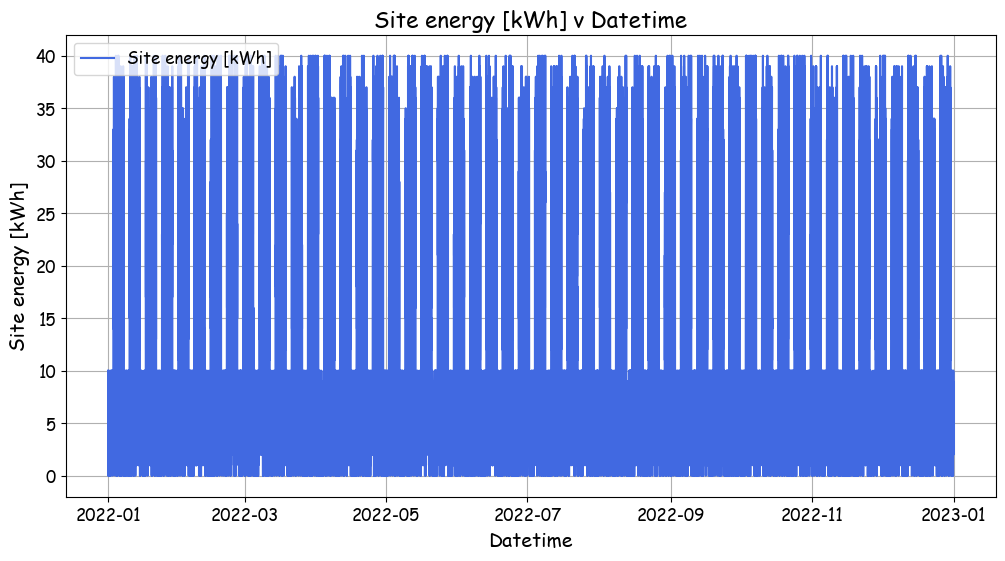

In [24]:
visualize.Visualizer(demand, viz_type=viz_types.StandardPlot()).plot_plt()

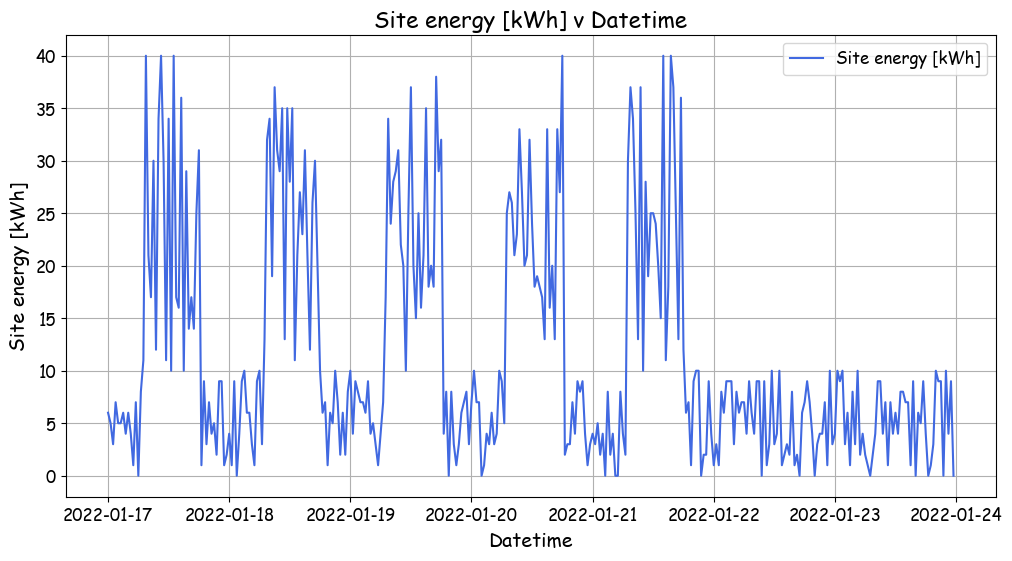

In [25]:
visualize.Visualizer(winter_week_demand, viz_type=viz_types.StandardPlot()).plot_plt()

### Power Energy

In [26]:
winter_week_demand_p_e = manipulations.EquationManipulator().data_formatter(winter_week_demand, 'Site energy [kWh]', '* 2', 'Site power [kW]')

In [27]:
winter_week_arr = np.array(winter_week_demand_p_e)

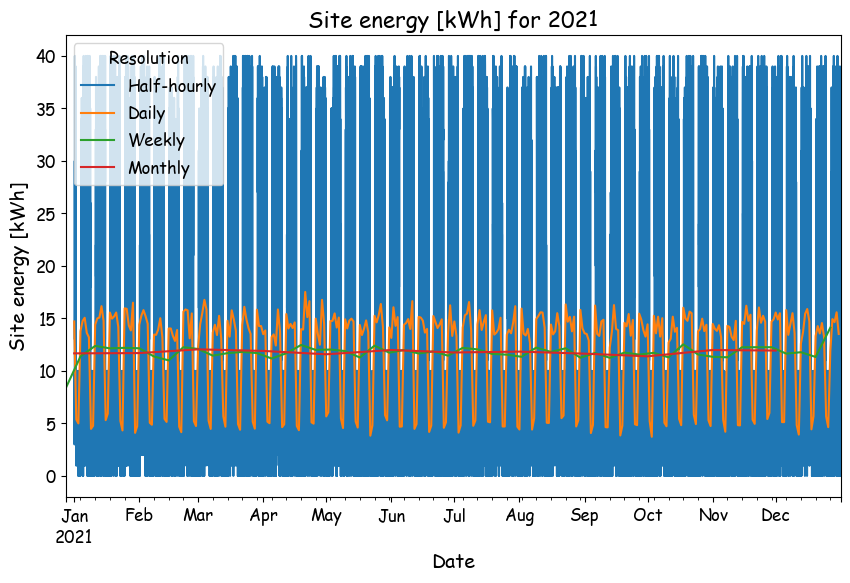

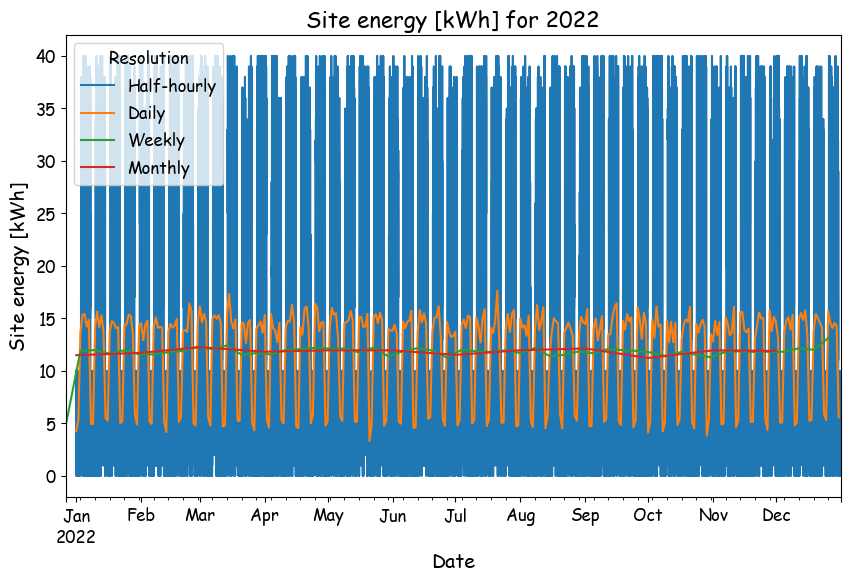

In [28]:
visualize.Visualizer(demand_two, viz_type=viz_types.AnnualPlot()).plot_plt()

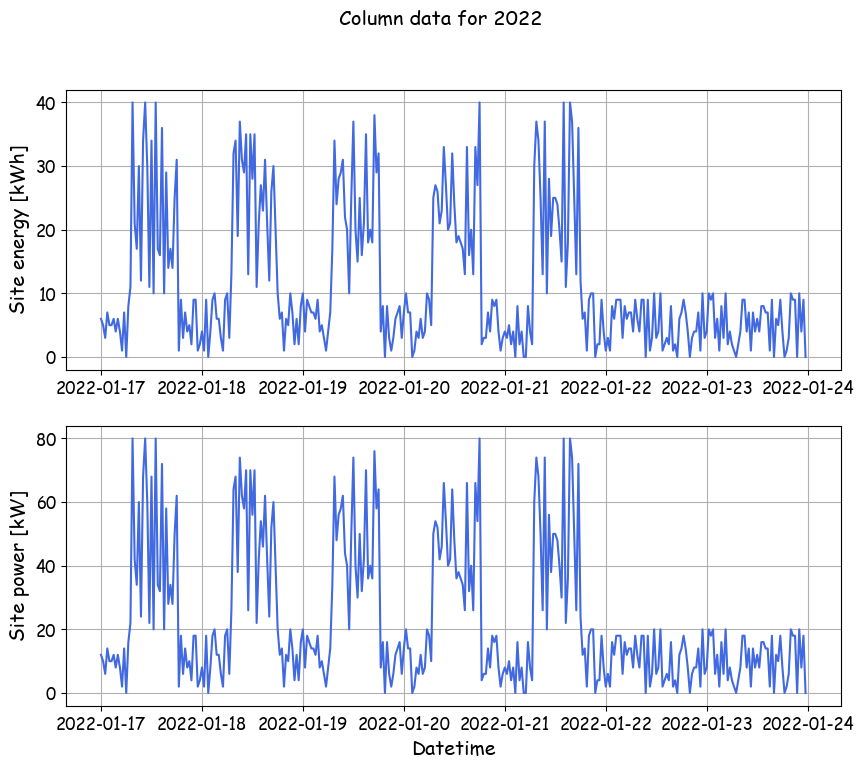

In [29]:
visualize.Visualizer(winter_week_demand_p_e, viz_type=viz_types.SubplotPlot()).plot_plt()

In [30]:
save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)

new_test_arr_to_df = manipulations.get_seasonal_week(bender_submeters)
bender_winter_week_demand = bender_submeters.loc[bender_submeters.index.isin(new_test_arr_to_df[0].index)]

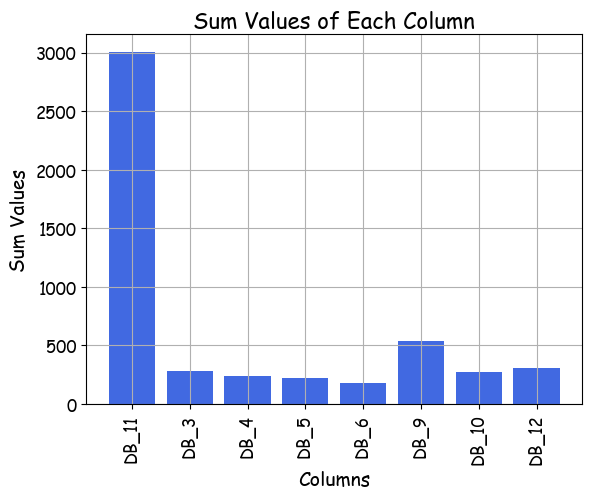

In [31]:
visualize.Visualizer(bender_winter_week_demand, viz_type=viz_types.BarPlot()).plot_plt()

In [32]:
described = visualize.Visualizer(bender_submeters, viz_type=viz_types.DataDescriber())
described.plot_plt()
described.viz_type._describe

                 DB_11          DB_3          DB_4          DB_5  \
Count     17520.000000  17520.000000  17520.000000  17520.000000   
Mean          4.197614      0.833613      0.682970      0.640112   
StD           4.335921      0.379993      1.065927      0.078980   
Min           0.238472      0.430443      0.035838      0.453167   
1%            0.313950      0.475305      0.036824      0.498025   
25%           0.793048      0.613206      0.038633      0.580715   
50%           2.450148      0.682368      0.040107      0.668872   
75%           6.212515      0.885478      1.018641      0.686295   
99%          17.665151      2.259092      3.377291      0.858160   
Max          29.391042      4.515401      3.908429      1.098172   
Range        29.152569      4.084958      3.872591      0.645005   
Sum       73542.194438  14604.896222  11965.642248  11214.755911   
Variance     18.800210      0.144395      1.136200      0.006238   
Skewness      1.520017      2.310825      1.3862

,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694
Max,29.391042,4.515401,3.908429,1.098172,3.883421,8.830542,6.867927,4.393893


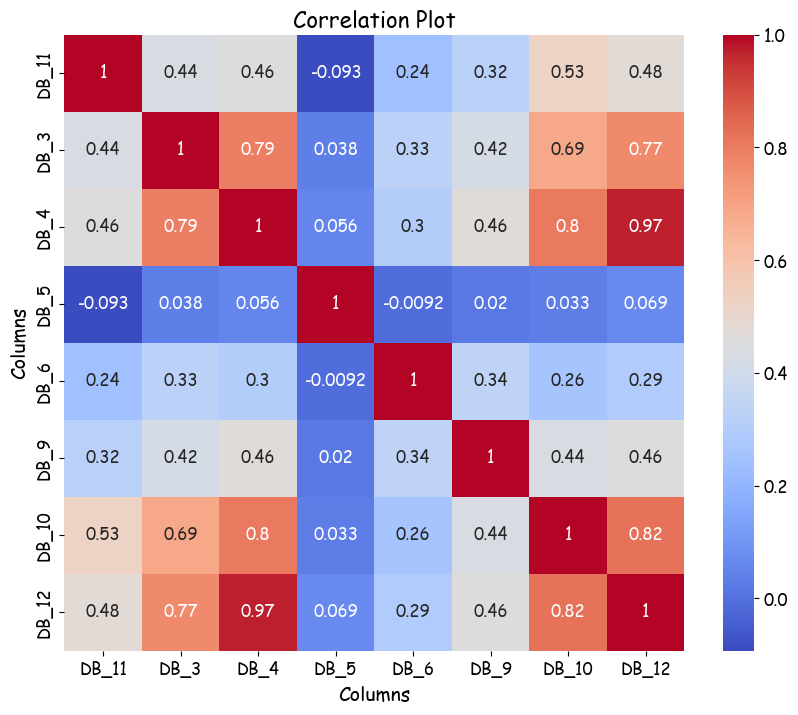

In [33]:
visualize.Visualizer(bender_submeters, viz_type=viz_types.CorrelationPlot()).plot_plt()

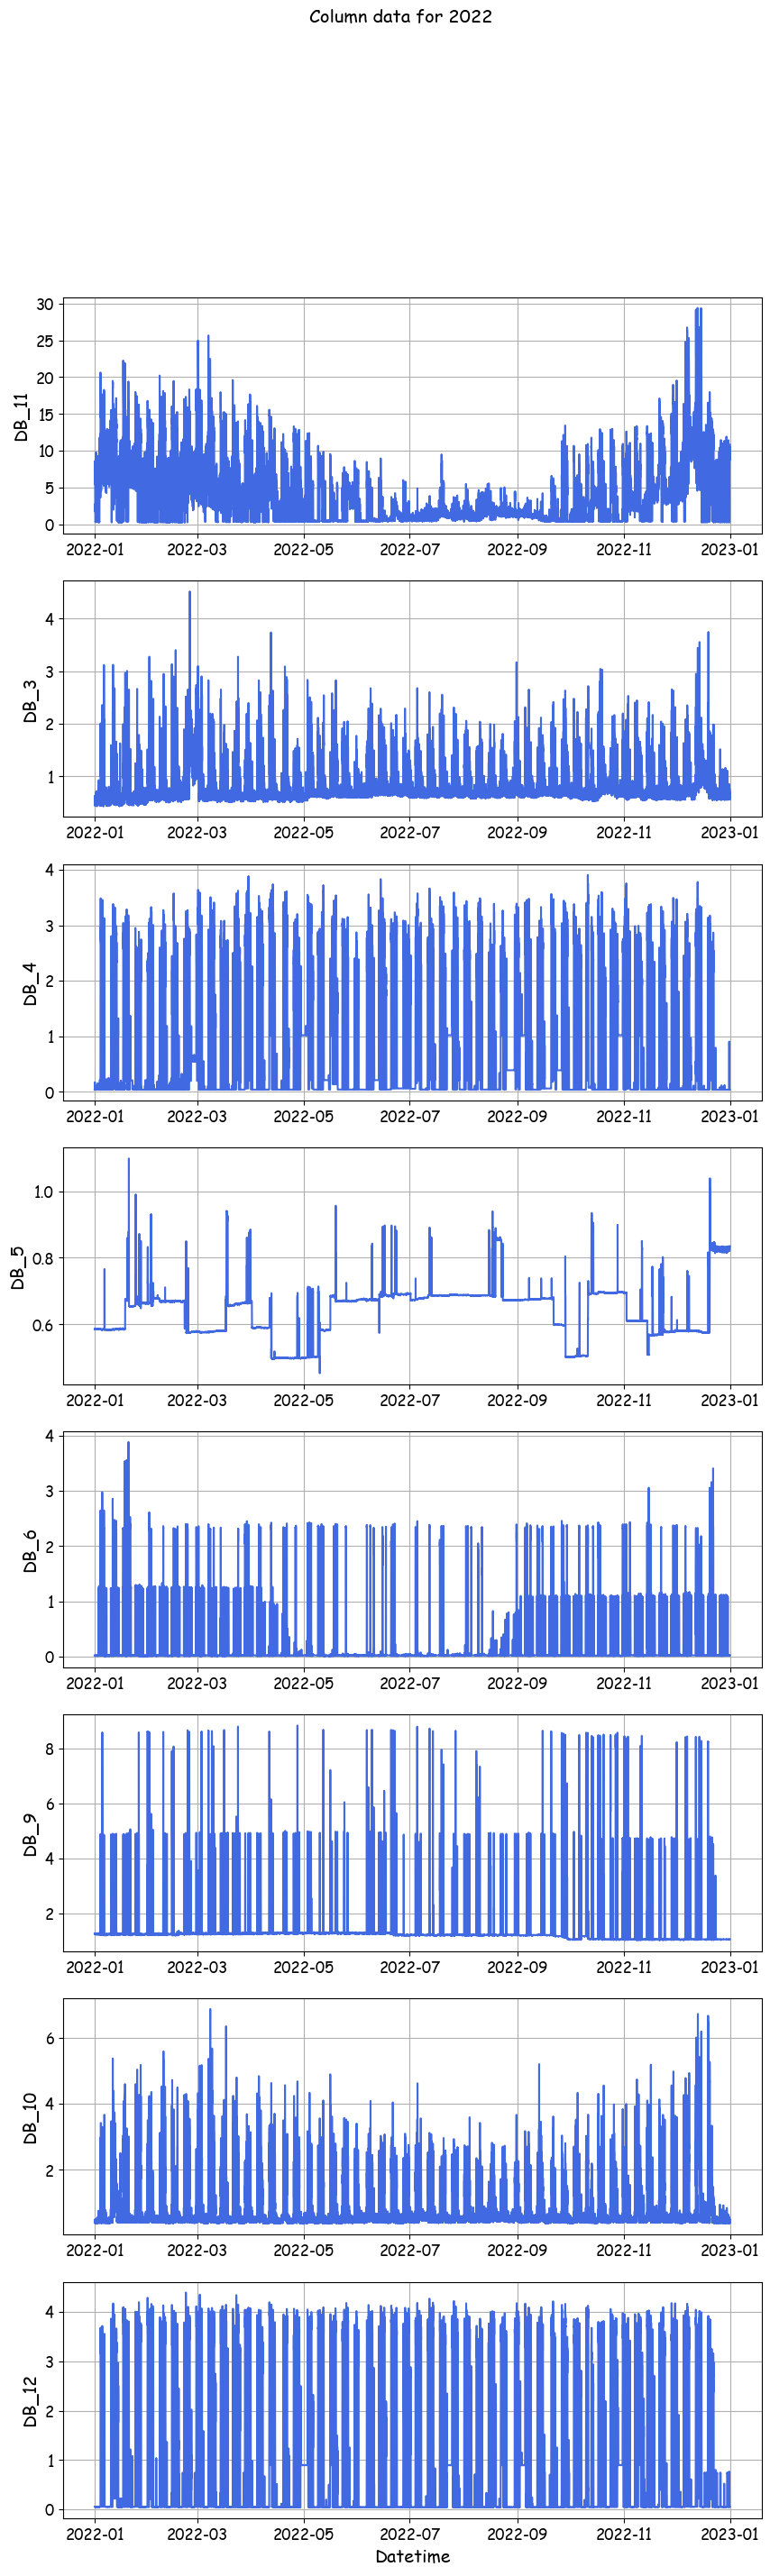

In [34]:
visualize.Visualizer(bender_submeters, viz_type=viz_types.SubplotPlot()).plot_plt()

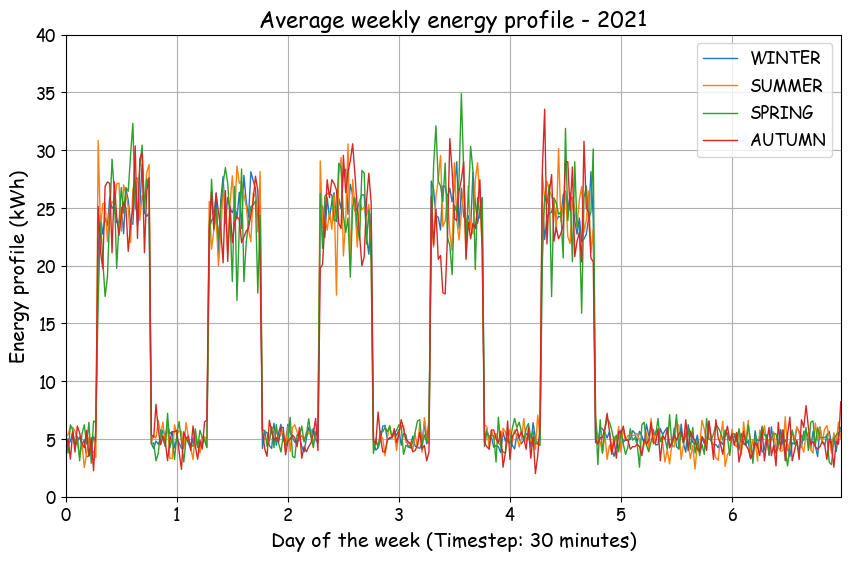

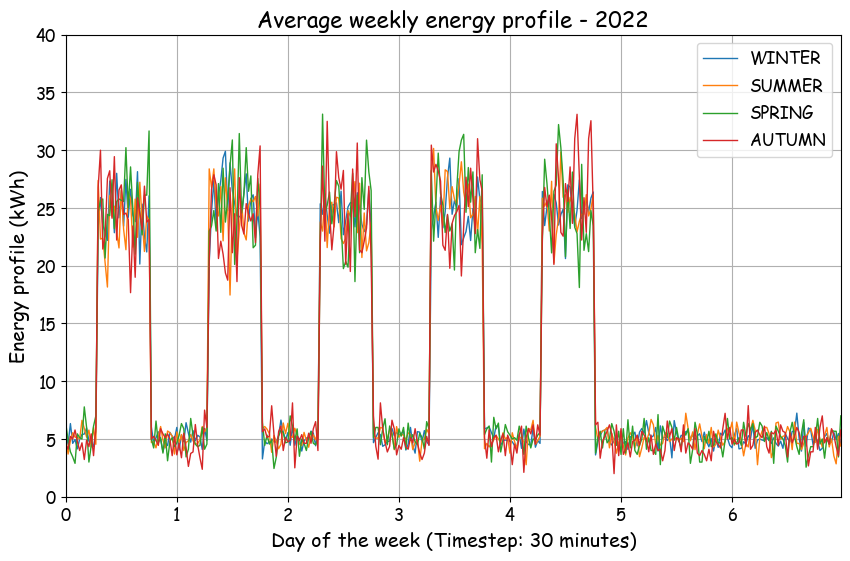

In [35]:
visualize.Visualizer(demand_two, viz_types.AnnualSeasonalWeekPlot()).plot_plt()

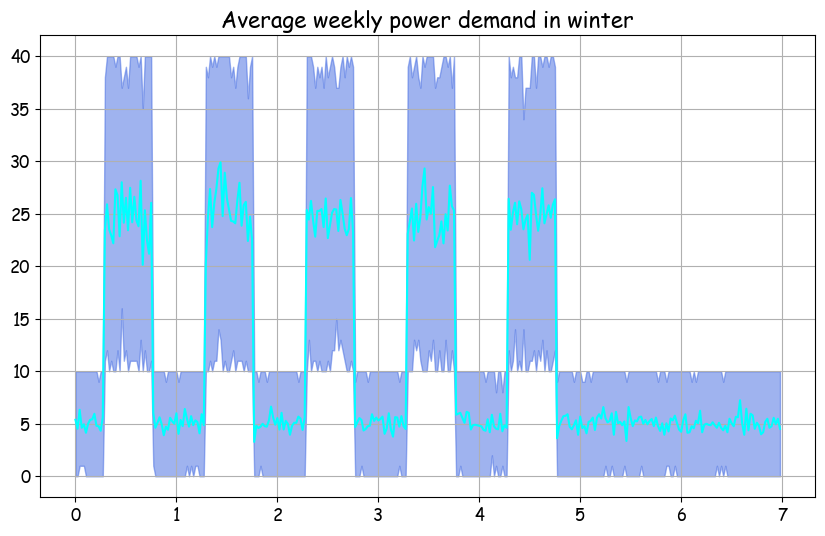

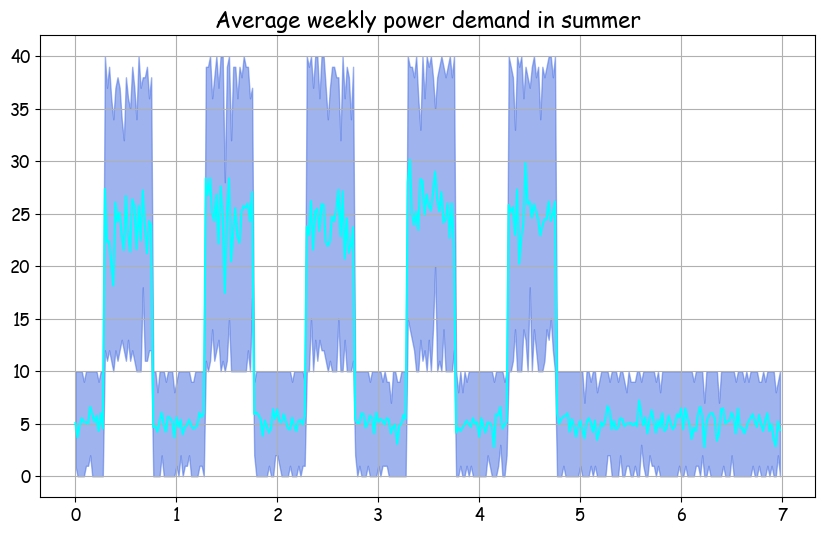

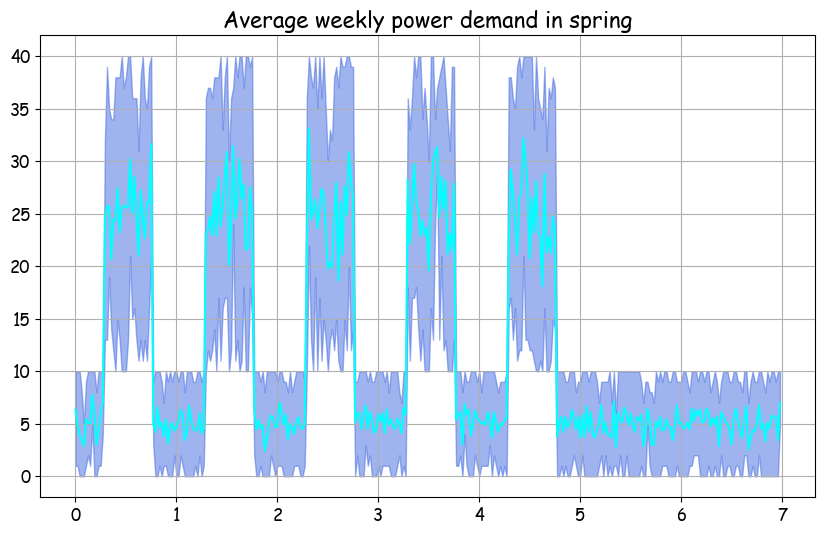

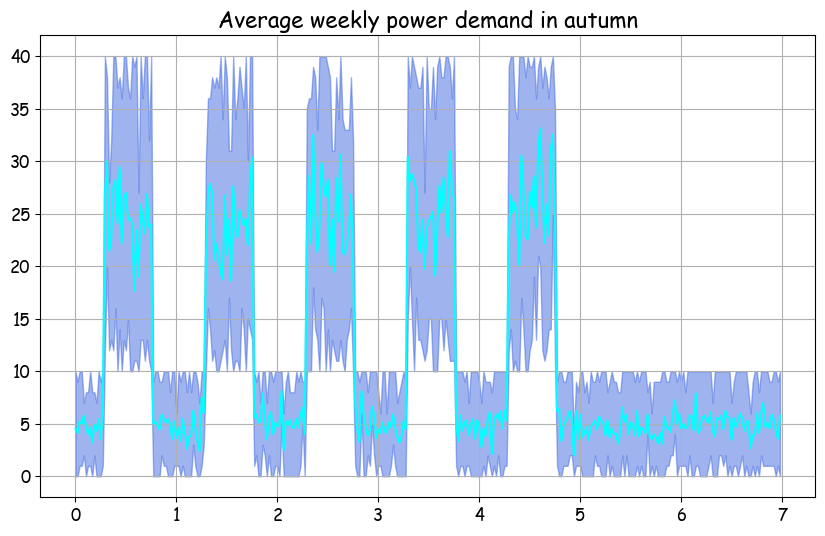

In [36]:
visualize.Visualizer(demand, viz_type=viz_types.AvgSeasonWeekPlot()).plot_plt() 

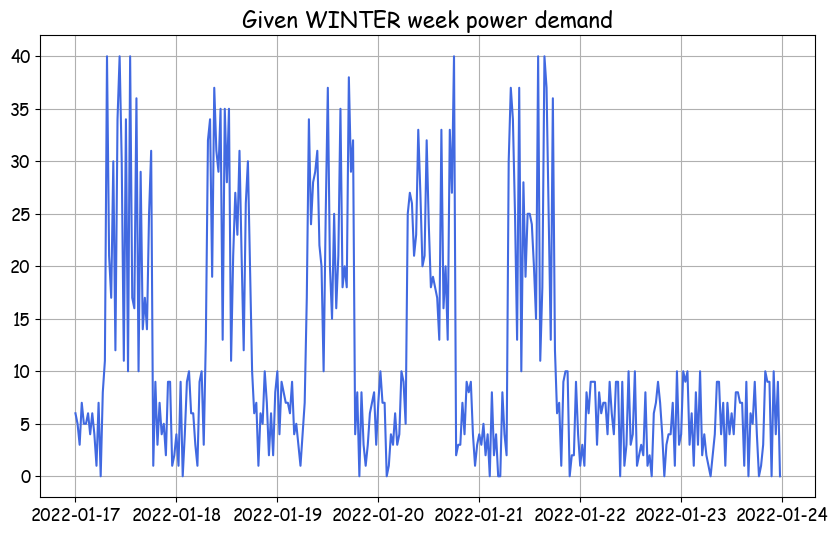

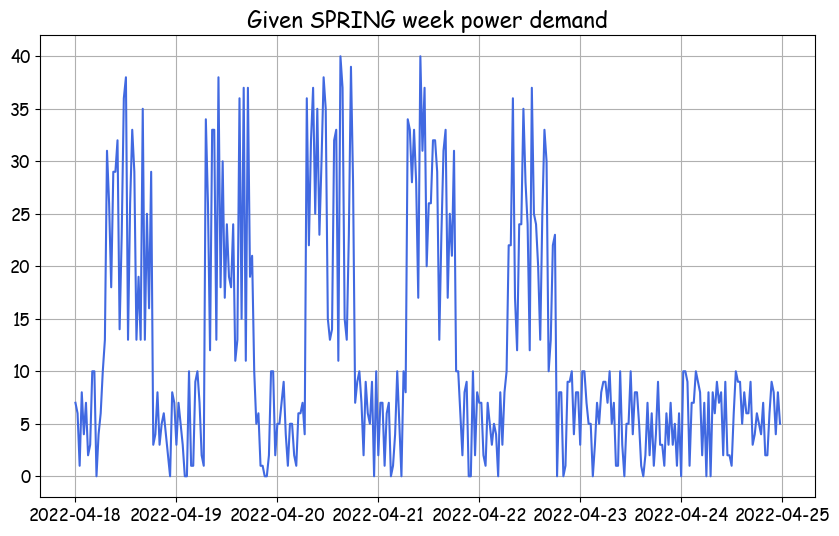

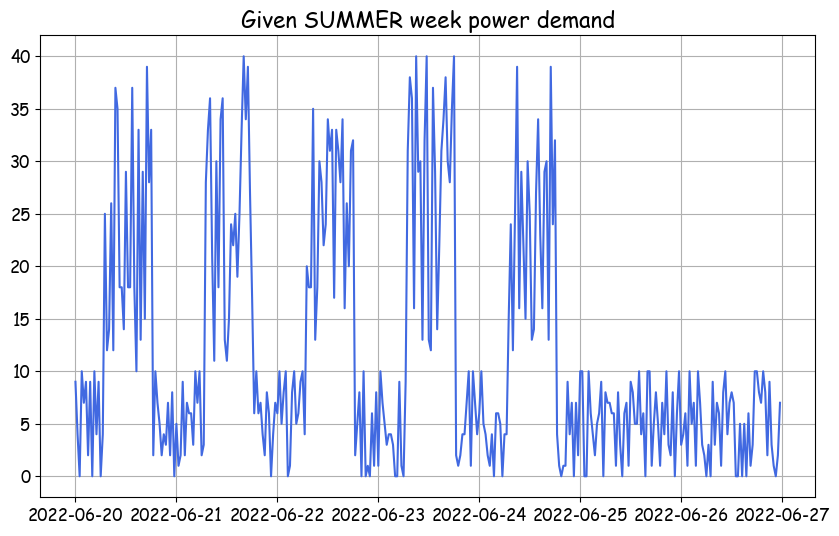

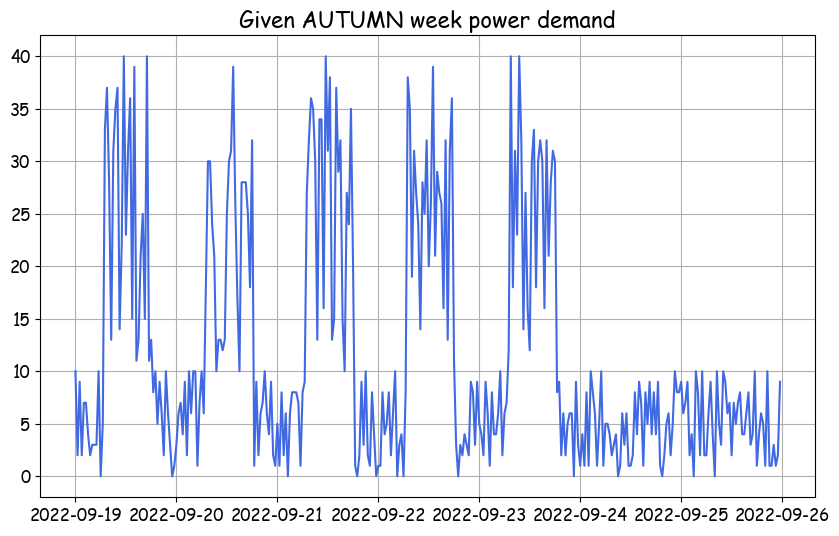

In [37]:
visualize.Visualizer(demand, viz_types.ActualSeasonWeekPlot()).plot_plt()